In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import math
%matplotlib inline

## Defining different properties to graph from the pandas data frame


In [2]:
amplitudes = [50,46,40,35]
wall = [[92,80],[80,736],[72,64],[64,56]]

plt.rcParams['font.size'] = 16

## Read data. Section1 and 2

In [5]:
part = pd.read_csv('particles-section1.csv')

pad50 = part[part['h']==0.5]
pad46 = part[part['h']==0.46]
pad40 = part[part['h']==0.4]
pad35 = part[part['h']<0.356]

part_s2 = pd.read_csv("particles-section2.csv") 

pad50_2 = part_s2[part_s2['h']==0.5]
pad46_2 = part_s2[part_s2['h']==0.46]
pad40_2 = part_s2[part_s2['h']==0.4]
pad35_2 = part_s2[part_s2['h']<0.356]

## Create data labels

In [8]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], marker='o', color='w', label='a=0.35',
                          markerfacecolor='k', markersize=8),
                   Line2D([0], [0], marker='P', color='w', label='a=0.40',
                          markerfacecolor='k', markersize=8),
                   Line2D([0], [0], marker='^', color='w', label='a=0.46',
                          markerfacecolor='k', markersize=8),
                   Line2D([0], [0], marker='X', color='w', label='a=0.50',
                          markerfacecolor='k', markersize=8)]

legend2 = [Patch(color='black', label=r'FOV 1, H=0.9'),
           Patch(color='grey', label=r'FOV 1, H=0.8'),
           Patch(color='blue', label=r'FOV 2, H=0.9'),
           Patch(color='lightblue', label=r'FOV 2, H=0.8')]


## Size Distributions. Comparison with Villermaux, Watanabe and Roisman

In all cases, the probility is normalized to the mean of the data: $x = \frac{D}{\overline{D}}$ 

### Villermaux 
$P_{\Gamma}(x) = \frac{n^n x^{n-1}e^{-nx}}{\Gamma(n)}$, $n=1/\mathtt{var} [x]$

### Watanabe
$P_{LN}(x) = \frac{1}{x\lambda \sqrt{2\pi}} e^{\frac{-(\ln{x}-\mu)^2}{2\lambda^2}}$, $\mu=\overline{\ln{x}}$, $\lambda = \mathtt{std} [\ln{x}]$ 

### Roisman
$P_{W}(x) = \frac{\beta}{\alpha}\left(\frac{x}{\alpha}\right)^{\beta-1} e^{-\left(\frac{x}{\alpha}\right)^{\beta}}$, $\alpha$ and $\beta$ empirically found: $\beta = 1.94, \alpha = 0.89$

# All data separeted by cases

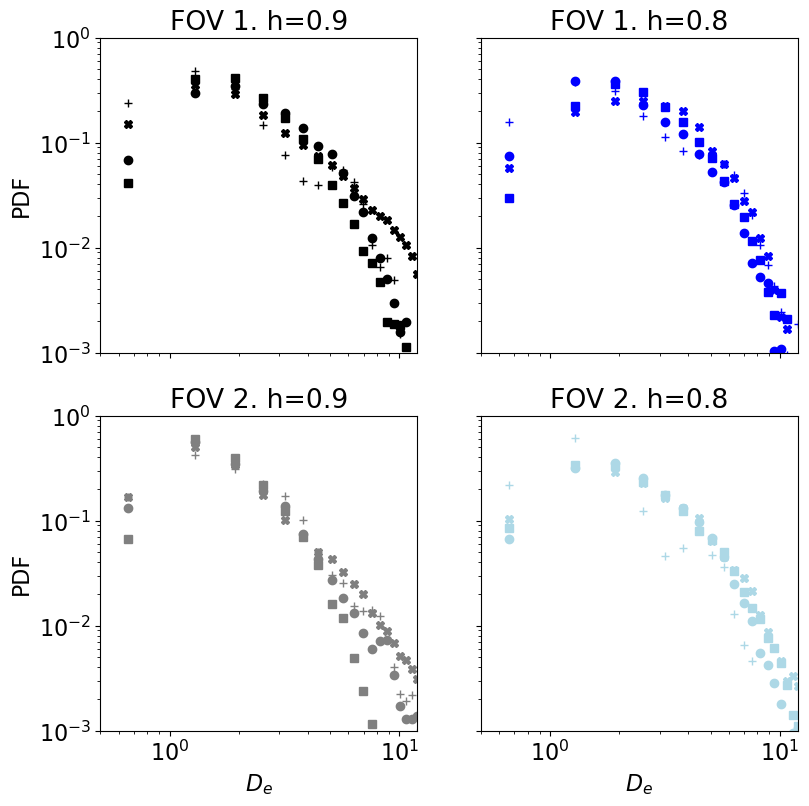

In [7]:
fig,ax = plt.subplots(2,2,figsize=(9,9),sharex=True,sharey=True)

x = np.linspace(0.03,12,20)
colors = ['k','b','gray','lightblue']
markers = ['+','X','o','s']

var_all = np.zeros((4,2,2))
   
ha = [0.9,0.8]
for i in range(2):
    dist = pad35[pad35['wall']==wall[3][i]]['size']
    variance = np.var(dist)
    var_all[0][0][i] = variance
    kde = st.gaussian_kde(dist)
    ax[0][i].plot(x,kde(x),markers[0], c=colors[i])
    
for i in range(2):
    dist = pad40[pad40['wall']==wall[2][i]]['size']
    variance = np.var(dist)
    var_all[1][0][i] = variance
    kde = st.gaussian_kde(dist)
    ax[0][i].plot(x,kde(x),markers[1], c=colors[i])

for i in range(2):
    dist = pad46[pad46['wall']==wall[1][i]]['size']
    variance = np.var(dist)
    var_all[2][0][i] = variance
    kde = st.gaussian_kde(dist)
    ax[0][i].plot(x,kde(x),markers[2], c=colors[i])

for i in range(2):
    #mean = pad50[pad50['wall']==wall[0][i]]['size'].mean()
    dist = pad50[pad50['wall']==wall[0][i]]['size']
    variance = np.var(dist)
    var_all[3][0][i] = variance
    kde = st.gaussian_kde(dist)
    ax[0][i].plot(x,kde(x),markers[3], c=colors[i])
    
###### Section 2 #####
for i in range(2):
    dist = pad35_2[pad35_2['wall']==wall[3][i]]['size']
    variance = np.var(dist)
    var_all[0][1][i] = variance
    kde = st.gaussian_kde(dist)
    ax[1][i].plot(x,kde(x),markers[0], c=colors[i+2])
    
for i in range(2):
    dist = pad40_2[pad40_2['wall']==wall[2][i]]['size']
    variance = np.var(dist)
    var_all[1][1][i] = variance
    kde = st.gaussian_kde(dist)
    ax[1][i].plot(x,kde(x),markers[1], c=colors[i+2])

for i in range(2):
    dist = pad46_2[pad46_2['wall']==wall[1][i]]['size']
    variance = np.var(dist)
    var_all[2][1][i] = variance
    kde = st.gaussian_kde(dist)
    ax[1][i].plot(x,kde(x),markers[2], c=colors[i+2])

for i in range(2):
    dist = pad50_2[pad50_2['wall']==wall[0][i]]['size']
    variance = np.var(dist)
    var_all[3][1][i] = variance
    kde = st.gaussian_kde(dist)
    ax[1][i].plot(x,kde(x),markers[3], c=colors[i+2])
    


ax[0][0].set_ylim(1e-3,1)
ax[0][0].set_xlim(0.50,12)
ax[0][0].set_ylabel('PDF')
ax[1][0].set_ylabel('PDF')
ax[1][1].set_xlabel('$D_{e}$')
ax[1][0].set_xlabel('$D_{e}$')
ax[0][0].set_title('FOV 1. h=0.9')
ax[0][1].set_title('FOV 1. h=0.8')
ax[1][0].set_title('FOV 2. h=0.9')
ax[1][1].set_title('FOV 2. h=0.8')
for i in range(2): 
    ax[0][i].set_xscale('log')
    ax[0][i].set_yscale('log')

# Separated by FOV and normalized by mean diameter

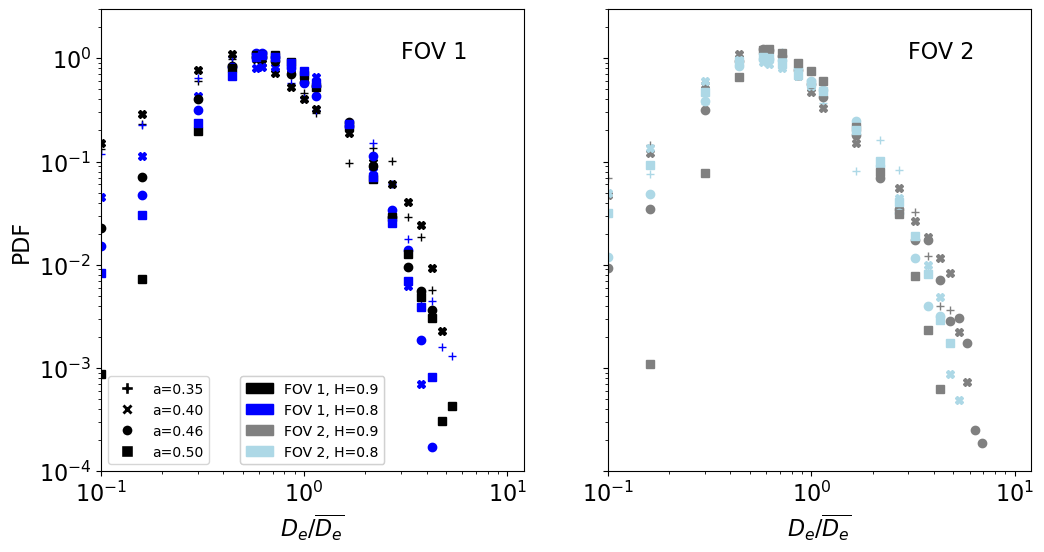

In [9]:
fig,ax = plt.subplots(1,2,figsize=(12,6),sharex=True,sharey=True)

x = np.linspace(0.1,10,20)
y = np.linspace(0.02,1,8)
colors = ['k','b','gray','lightblue']
markers = ['+','X','o','s']

var_all_norm = np.zeros((4,2,2))
   
ha = [0.9,0.8]
for i in range(2):
    mean = pad35[pad35['wall']==wall[3][i]]['size'].mean()
    dist = pad35[pad35['wall']==wall[3][i]]['size']
    variance = np.var(dist/mean)
    var_all_norm[0][0][i] = variance
    kde = st.gaussian_kde(dist/mean)
    ax[0].plot(x,kde(x),markers[0], c=colors[i])
    ax[0].plot(y,kde(y),markers[0], c=colors[i])
    
for i in range(2):
    mean = pad40[pad40['wall']==wall[2][i]]['size'].mean()
    dist = pad40[pad40['wall']==wall[2][i]]['size']
    variance = np.var(dist/mean)
    var_all_norm[1][0][i] = variance
    kde = st.gaussian_kde(dist/mean)
    ax[0].plot(x,kde(x),markers[1], c=colors[i])
    ax[0].plot(y,kde(y),markers[1], c=colors[i])

for i in range(2):
    mean = pad46[pad46['wall']==wall[1][i]]['size'].mean()
    dist = pad46[pad46['wall']==wall[1][i]]['size']
    variance = np.var(dist/mean)
    var_all_norm[2][0][i] = variance
    kde = st.gaussian_kde(dist/mean)
    ax[0].plot(x,kde(x),markers[2], c=colors[i])
    ax[0].plot(y,kde(y),markers[2], c=colors[i])

for i in range(2):
    mean = pad50[pad50['wall']==wall[0][i]]['size'].mean()
    dist = pad50[pad50['wall']==wall[0][i]]['size']
    variance = np.var(dist/mean)
    var_all_norm[3][0][i] = variance
    kde = st.gaussian_kde(dist/mean)
    ax[0].plot(x,kde(x),markers[3], c=colors[i])
    ax[0].plot(y,kde(y),markers[3], c=colors[i])
    
###### Section 2 #####
for i in range(2):
    mean = pad35_2[pad35_2['wall']==wall[3][i]]['size'].mean()
    dist = pad35_2[pad35_2['wall']==wall[3][i]]['size']
    variance = np.var(dist/mean)
    var_all_norm[0][1][i] = variance
    kde = st.gaussian_kde(dist/mean)
    ax[1].plot(x,kde(x),markers[0], c=colors[i+2])
    ax[1].plot(y,kde(y),markers[0], c=colors[i+2])
    
for i in range(2):
    mean = pad40_2[pad40_2['wall']==wall[2][i]]['size'].mean()
    dist = pad40_2[pad40_2['wall']==wall[2][i]]['size']
    variance = np.var(dist/mean)
    var_all_norm[1][1][i] = variance
    kde = st.gaussian_kde(dist/mean)
    ax[1].plot(x,kde(x),markers[1], c=colors[i+2])
    ax[1].plot(y,kde(y),markers[1], c=colors[i+2])

for i in range(2):
    mean = pad46_2[pad46_2['wall']==wall[1][i]]['size'].mean()
    dist = pad46_2[pad46_2['wall']==wall[1][i]]['size']
    variance = np.var(dist/mean)
    var_all_norm[2][1][i] = variance
    kde = st.gaussian_kde(dist/mean)
    ax[1].plot(x,kde(x),markers[2], c=colors[i+2])
    ax[1].plot(y,kde(y),markers[2], c=colors[i+2])

for i in range(2):
    mean = pad50_2[pad50_2['wall']==wall[0][i]]['size'].mean()
    dist = pad50_2[pad50_2['wall']==wall[0][i]]['size']
    variance = np.var(dist/mean)
    var_all_norm[3][1][i] = variance
    kde = st.gaussian_kde(dist/mean)
    ax[1].plot(x,kde(x),markers[3], c=colors[i+2])
    ax[1].plot(y,kde(y),markers[3], c=colors[i+2])
    


ax[0].set_ylim(1e-4,3)
ax[0].set_xlim(0.1,12)
ax[0].set_ylabel('PDF')
ax[0].set_xlabel('$D_{e}/\overline{D_e}$')
ax[1].set_xlabel('$D_{e}/\overline{D_e}$')
ax[0].text(3,1,'FOV 1')
ax[1].text(3,1,'FOV 2')
for i in range(2): 
    ax[i].set_xscale('log')
    ax[i].set_yscale('log')
legend_elements = [Line2D([0], [0], marker='P', color='w', label='a=0.35',
                          markerfacecolor='k', markersize=8),
                   Line2D([0], [0], marker='X', color='w', label='a=0.40',
                          markerfacecolor='k', markersize=8),
                   Line2D([0], [0], marker='o', color='w', label='a=0.46',
                          markerfacecolor='k', markersize=8),
                   Line2D([0], [0], marker='s', color='w', label='a=0.50',
                          markerfacecolor='k', markersize=8)]

legend2 = [Patch(color='black', label=r'FOV 1, H=0.9'),
           Patch(color='blue', label=r'FOV 1, H=0.8'),
           Patch(color='grey', label=r'FOV 2, H=0.9'),
           Patch(color='lightblue', label=r'FOV 2, H=0.8')]
leg = ax[0].legend(handles=legend_elements, loc='lower left', fontsize=10)
ax[0].add_artist(leg)
leg2 = ax[0].legend(handles=legend2, loc='lower center', fontsize=10)
ax[0].add_artist(leg2)

# Normalized all collapsed in one

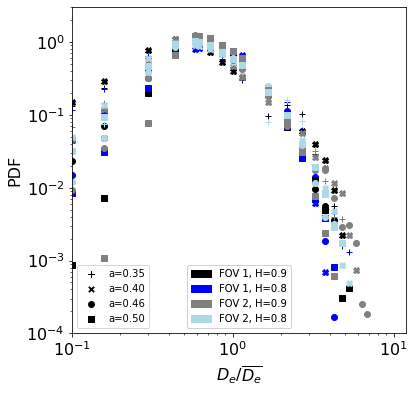

In [119]:
fig,ax = plt.subplots(1,1,figsize=(6,6),sharex=True,sharey=True)

x = np.linspace(0.1,10,20)
y = np.linspace(0.02,1,8)
colors = ['k','b','gray','lightblue']
markers = ['+','X','o','s']
   
ha = [0.9,0.8]
for i in range(2):
    mean = pad35[pad35['wall']==wall[3][i]]['size'].mean()
    dist = pad35[pad35['wall']==wall[3][i]]['size']
    variance = np.var(dist/mean)
    kde = st.gaussian_kde(dist/mean)
    ax.plot(x,kde(x),markers[0], c=colors[i])
    ax.plot(y,kde(y),markers[0], c=colors[i])
    
for i in range(2):
    mean = pad40[pad40['wall']==wall[2][i]]['size'].mean()
    dist = pad40[pad40['wall']==wall[2][i]]['size']
    variance = np.var(dist/mean)
    kde = st.gaussian_kde(dist/mean)
    ax.plot(x,kde(x),markers[1], c=colors[i])
    ax.plot(y,kde(y),markers[1], c=colors[i])

for i in range(2):
    mean = pad46[pad46['wall']==wall[1][i]]['size'].mean()
    dist = pad46[pad46['wall']==wall[1][i]]['size']
    variance = np.var(dist/mean)
    kde = st.gaussian_kde(dist/mean)
    ax.plot(x,kde(x),markers[2], c=colors[i])
    ax.plot(y,kde(y),markers[2], c=colors[i])

for i in range(2):
    mean = pad50[pad50['wall']==wall[0][i]]['size'].mean()
    dist = pad50[pad50['wall']==wall[0][i]]['size']
    variance = np.var(dist/mean)
    kde = st.gaussian_kde(dist/mean)
    ax.plot(x,kde(x),markers[3], c=colors[i])
    ax.plot(y,kde(y),markers[3], c=colors[i])
    
###### Section 2 #####
for i in range(2):
    mean = pad35_2[pad35_2['wall']==wall[3][i]]['size'].mean()
    dist = pad35_2[pad35_2['wall']==wall[3][i]]['size']
    variance = np.var(dist/mean)
    kde = st.gaussian_kde(dist/mean)
    ax.plot(x,kde(x),markers[0], c=colors[i+2])
    ax.plot(y,kde(y),markers[0], c=colors[i+2])
    
for i in range(2):
    mean = pad40_2[pad40_2['wall']==wall[2][i]]['size'].mean()
    dist = pad40_2[pad40_2['wall']==wall[2][i]]['size']
    variance = np.var(dist/mean)
    kde = st.gaussian_kde(dist/mean)
    ax.plot(x,kde(x),markers[1], c=colors[i+2])
    ax.plot(y,kde(y),markers[1], c=colors[i+2])

for i in range(2):
    mean = pad46_2[pad46_2['wall']==wall[1][i]]['size'].mean()
    dist = pad46_2[pad46_2['wall']==wall[1][i]]['size']
    variance = np.var(dist/mean)
    kde = st.gaussian_kde(dist/mean)
    ax.plot(x,kde(x),markers[2], c=colors[i+2])
    ax.plot(y,kde(y),markers[2], c=colors[i+2])

for i in range(2):
    mean = pad50_2[pad50_2['wall']==wall[0][i]]['size'].mean()
    dist = pad50_2[pad50_2['wall']==wall[0][i]]['size']
    variance = np.var(dist/mean)
    kde = st.gaussian_kde(dist/mean)
    ax.plot(x,kde(x),markers[3], c=colors[i+2])
    ax.plot(y,kde(y),markers[3], c=colors[i+2])
    


ax.set_ylim(1e-4,3)
ax.set_xlim(0.1,12)
ax.set_ylabel('PDF')
ax.set_xlabel('$D_{e}/\overline{D_e}$')
#ax.text(3,1,'FOV 1')
for i in range(2): 
    ax.set_xscale('log')
    ax.set_yscale('log')
legend_elements = [Line2D([0], [0], marker='P', color='w', label='a=0.35',
                          markerfacecolor='k', markersize=8),
                   Line2D([0], [0], marker='X', color='w', label='a=0.40',
                          markerfacecolor='k', markersize=8),
                   Line2D([0], [0], marker='o', color='w', label='a=0.46',
                          markerfacecolor='k', markersize=8),
                   Line2D([0], [0], marker='s', color='w', label='a=0.50',
                          markerfacecolor='k', markersize=8)]
legend2 = [Patch(color='black', label=r'FOV 1, H=0.9'),
           Patch(color='blue', label=r'FOV 1, H=0.8'),
           Patch(color='grey', label=r'FOV 2, H=0.9'),
           Patch(color='lightblue', label=r'FOV 2, H=0.8')]
leg = ax.legend(handles=legend_elements, loc='lower left', fontsize=10)
ax.add_artist(leg)
leg2 = ax.legend(handles=legend2, loc='lower center', fontsize=10)
ax.add_artist(leg2)


fig.savefig('size-normalized-all-collapsed.png',dpi=300,bbox_inches='tight')